In [2]:
# Some libraries 
#for Exploratory Data Analysis(EDA)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors
import matplotlib.ticker as mtick
from scipy.stats import ttest_ind_from_stats
from scipy.stats import chi2_contingency

# Loading Data

In [36]:
##loading data
df = pd.read_csv("diabetes_dataset/diabetes_binary_health_indicators_BRFSS2015.csv")

df.shape

(253680, 22)

In [37]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Cleaning Data

In [39]:
# Missing value chskc
print(f'Missing values of Data:\n{df.isna().sum()}')

Missing values of Data:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [8]:
duplicates = df[df.duplicated()]
print('Number of Duplicate Rows :' ,len(duplicates))

duplicates.head()

Number of Duplicate Rows : 24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [9]:
df = df.drop_duplicates()

In [10]:
df.describe(include='all').T 

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,229474.0,0.152945,0.359936,0.0,0.0,0.0,0.0,1.0
HighBP,229474.0,0.454343,0.497912,0.0,0.0,0.0,1.0,1.0
HighChol,229474.0,0.441640,0.496584,0.0,0.0,0.0,1.0,1.0
CholCheck,229474.0,0.959481,0.197173,0.0,1.0,1.0,1.0,1.0
BMI,229474.0,28.687507,6.789204,12.0,24.0,27.0,32.0,98.0
Smoker,229474.0,0.465800,0.498830,0.0,0.0,0.0,1.0,1.0
Stroke,229474.0,0.044816,0.206899,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229474.0,0.103336,0.304398,0.0,0.0,0.0,0.0,1.0
PhysActivity,229474.0,0.733042,0.442371,0.0,0.0,1.0,1.0,1.0
Fruits,229474.0,0.612675,0.487140,0.0,0.0,1.0,1.0,1.0


Diabetes_binary
1.0     35097
0.0    194377
Name: count, dtype: int64
Diabetes_binary
1.0    15.294543%
0.0    84.705457%
Name: proportion, dtype: object



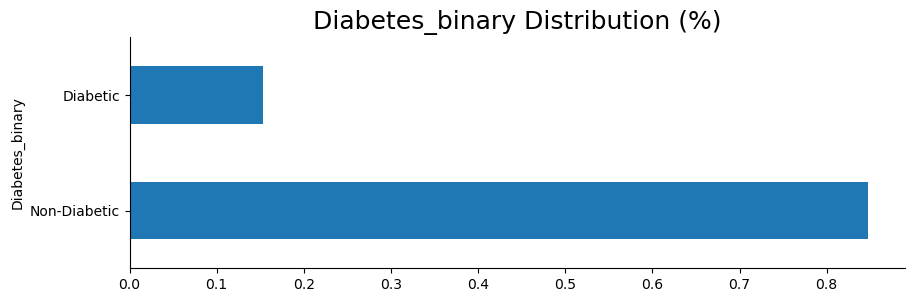

In [11]:
print(df['Diabetes_binary'].value_counts(ascending=True))
print(df['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
df['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 3)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

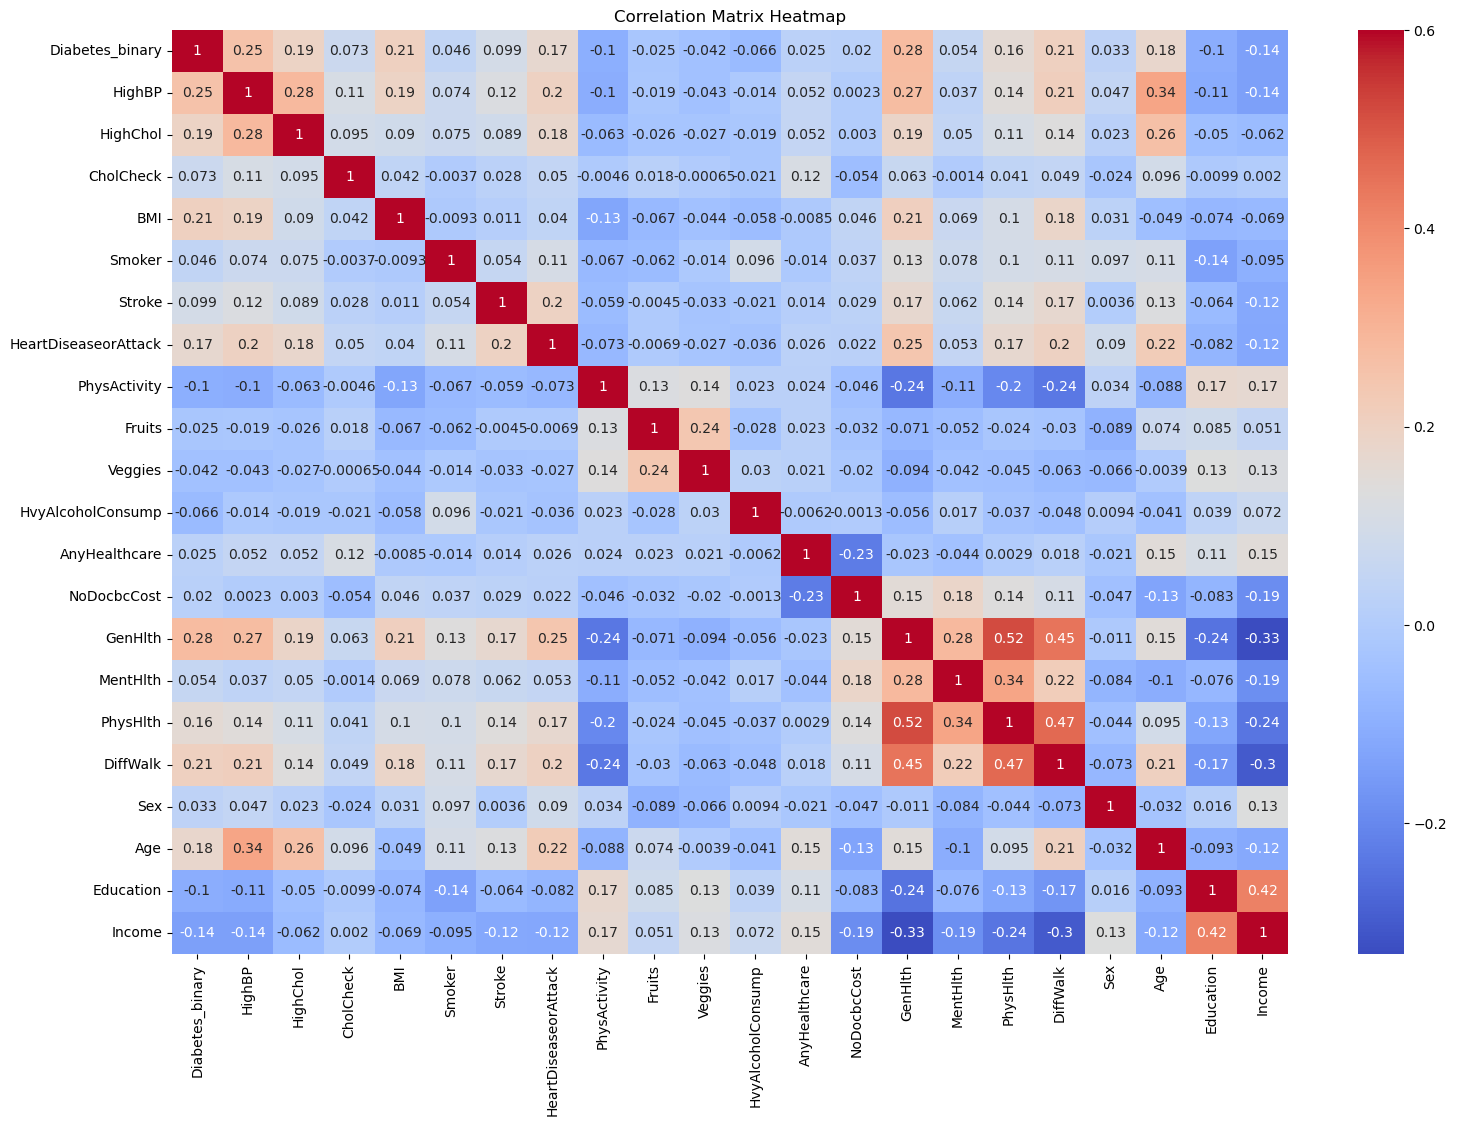

In [16]:
# Create a correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',vmax=0.6)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
# list of columns sorted by Pearson correlation
pear_coor = (df.drop('Diabetes_binary', axis=1)
   .corrwith(df.Diabetes_binary)
   .abs()
   .sort_values(ascending=False))
pear_coor

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Income                  0.140659
Education               0.102686
PhysActivity            0.100404
Stroke                  0.099193
CholCheck               0.072523
HvyAlcoholConsump       0.065950
MentHlth                0.054153
Smoker                  0.045504
Veggies                 0.041734
Sex                     0.032724
AnyHealthcare           0.025331
Fruits                  0.024805
NoDocbcCost             0.020048
dtype: float64

In [18]:
# Assigning the variable as diabetic or non diabetic
target = 'Diabetes_binary'
bool_vars = (df.nunique()[df.nunique() == 2]
                .index
                .drop(labels='Diabetes_binary'))
num_vars = [var for var in df.columns if var not in bool_vars and var != 'Diabetes_binary']


In [19]:
num_vars

['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

In [20]:
bool_vars

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'],
      dtype='object')

In [21]:
#converting numerical data to categorical in order to understand the data easily

df_copy = df.copy()

age_mapping = {
    1: '18 to 24',
    2: '25 to 29',
    3: '30 to 34',
    4: '35 to 39',
    5: '40 to 44',
    6: '45 to 49',
    7: '50 to 54',
    8: '55 to 59',
    9: '60 to 64',
    10: '65 to 69',
    11: '70 to 74',
    12: '75 to 79',
    13: '80 or older'
}

diabetes_mapping = {
    0: 'No Diabetes',
    2: 'Diabetes'
}

high_bp_mapping = {
    0: 'No High',
    1: 'High BP'
}

high_chol_mapping = {
    0: 'No High Cholesterol',
    1: 'High Cholesterol'
}

chol_check_mapping = {
    0: 'No Cholesterol Check in 5 Years',
    1: 'Cholesterol Check in 5 Years'
}

smoker_mapping = {
    0: 'No',
    1: 'Yes'
}

stroke_mapping = {
    0: 'No',
    1: 'Yes'
}

heart_disease_mapping = {
    0: 'No',
    1: 'Yes'
}

phys_activity_mapping = {
    0: 'No',
    1: 'Yes'
}

fruits_mapping = {
    0: 'No',
    1: 'Yes'
}

veggies_mapping = {
    0: 'No',
    1: 'Yes'
}

hvy_alcohol_mapping = {
    0: 'No',
    1: 'Yes'
}

healthcare_mapping = {
    0: 'No',
    1: 'Yes'
}

no_docbc_cost_mapping = {
    0: 'No',
    1: 'Yes'
}

gen_hlth_mapping = {
    5: 'Excellent',
    4: 'Very Good',
    3: 'Good',
    2: 'Fair',
    1: 'Poor'
}

diff_walk_mapping = {
    0: 'No',
    1: 'Yes'
}

sex_mapping = {
    0: 'Female',
    1: 'Male'
}

education_mapping = {
    1: 'Never Attended School',
    2: 'Elementary',
    3: 'Junior High School',
    4: 'Senior High School',
    5: 'Undergraduate Degree',
    6: 'Master or Higher'
}

income_mapping = {
    1: 'Less Than $10,000',
    2: 'Less Than $15,000',
    3: 'Less Than $25,000',
    4: 'Less Than $30,000',
    5: 'Less Than $35,000',
    6: 'Less Than $50,000',
    7: 'Less Than $60,000',
    8: '$75,000 or More'
}

df_copy['Age'] = df_copy['Age'].replace(age_mapping)
df_copy['Diabetes_binary'] = df_copy['Diabetes_binary'].replace(diabetes_mapping)
df_copy['HighBP'] = df_copy['HighBP'].replace(high_bp_mapping)
df_copy['HighChol'] = df_copy['HighChol'].replace(high_chol_mapping)
df_copy['CholCheck'] = df_copy['CholCheck'].replace(chol_check_mapping)
df_copy['Smoker'] = df_copy['Smoker'].replace(smoker_mapping)
df_copy['Stroke'] = df_copy['Stroke'].replace(stroke_mapping)
df_copy['HeartDiseaseorAttack'] = df_copy['HeartDiseaseorAttack'].replace(heart_disease_mapping)
df_copy['PhysActivity'] = df_copy['PhysActivity'].replace(phys_activity_mapping)
df_copy['Fruits'] = df_copy['Fruits'].replace(fruits_mapping)
df_copy['Veggies'] = df_copy['Veggies'].replace(veggies_mapping)
df_copy['HvyAlcoholConsump'] = df_copy['HvyAlcoholConsump'].replace(hvy_alcohol_mapping)
df_copy['AnyHealthcare'] = df_copy['AnyHealthcare'].replace(healthcare_mapping)
df_copy['NoDocbcCost'] = df_copy['NoDocbcCost'].replace(no_docbc_cost_mapping)
df_copy['GenHlth'] = df_copy['GenHlth'].replace(gen_hlth_mapping)
df_copy['DiffWalk'] = df_copy['DiffWalk'].replace(diff_walk_mapping)
df_copy['Sex'] = df_copy['Sex'].replace(sex_mapping)
df_copy['Education'] = df_copy['Education'].replace(education_mapping)
df_copy['Income'] = df_copy['Income'].replace(income_mapping)

df_copy.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,40.0,Yes,No,No,No,No,...,Yes,No,Excellent,18.0,15.0,Yes,Female,60 to 64,Senior High School,"Less Than $25,000"
1,No Diabetes,No High,No High Cholesterol,No Cholesterol Check in 5 Years,25.0,Yes,No,No,Yes,No,...,No,Yes,Good,0.0,0.0,No,Female,50 to 54,Master or Higher,"Less Than $10,000"
2,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,28.0,No,No,No,No,Yes,...,Yes,Yes,Excellent,30.0,30.0,Yes,Female,60 to 64,Senior High School,"$75,000 or More"
3,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,27.0,No,No,No,Yes,Yes,...,Yes,No,Fair,0.0,0.0,No,Female,70 to 74,Junior High School,"Less Than $50,000"
4,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,24.0,No,No,No,Yes,Yes,...,Yes,No,Fair,3.0,0.0,No,Female,70 to 74,Undergraduate Degree,"Less Than $30,000"


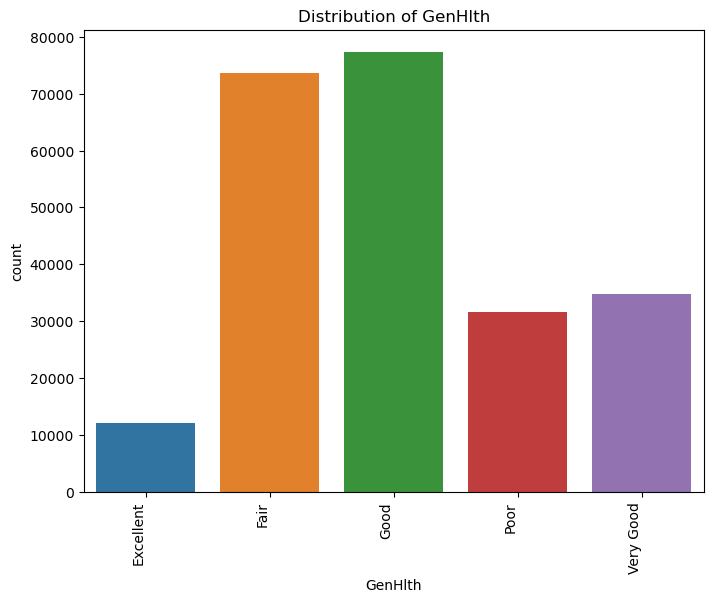

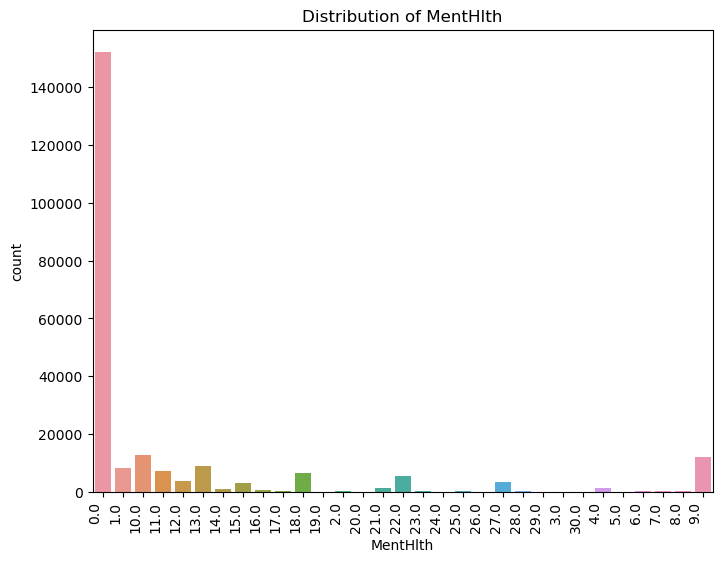

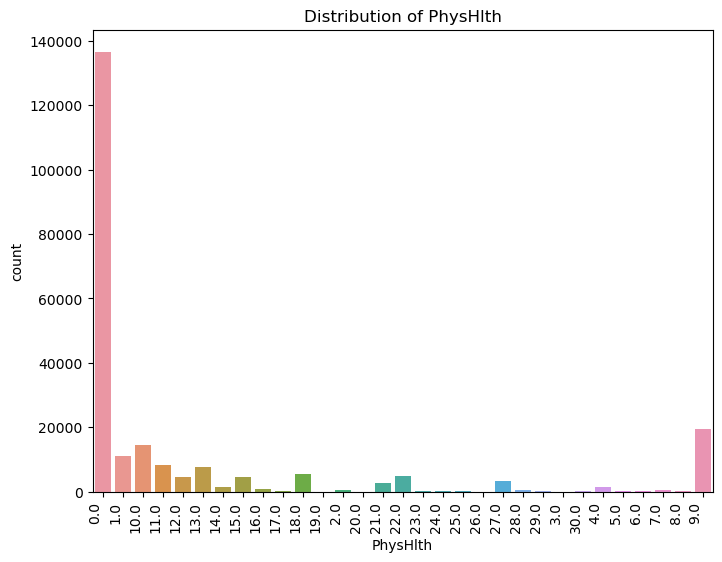

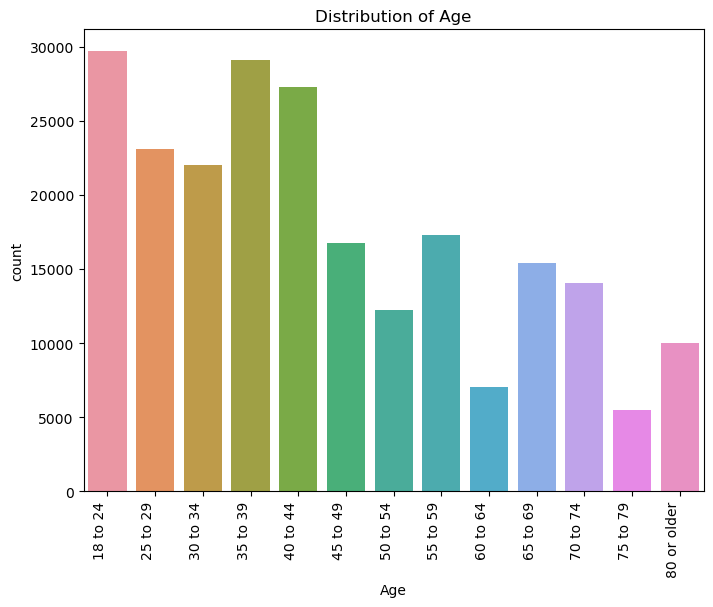

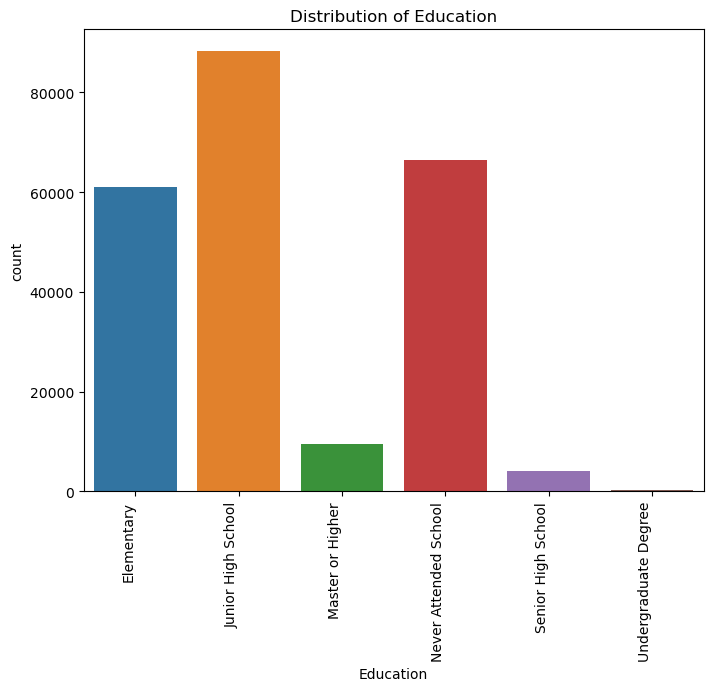

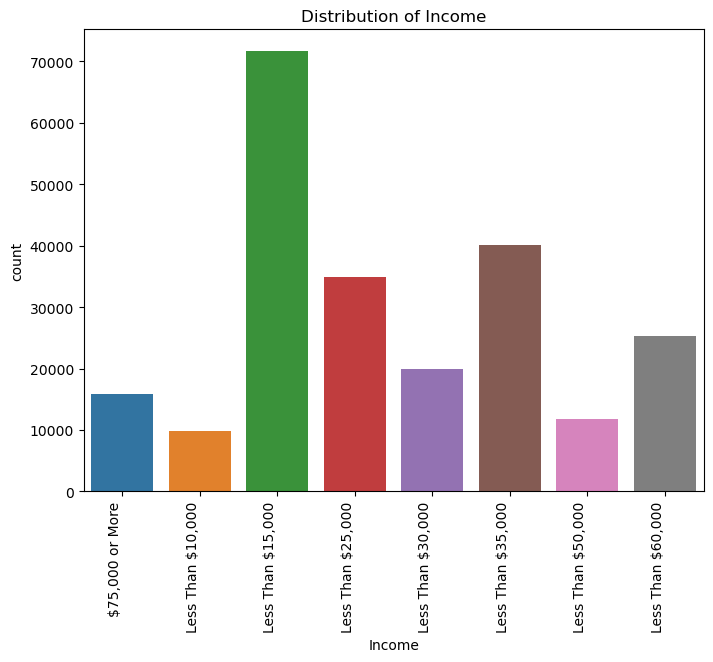

In [23]:
my_vars = ['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


for var in my_vars:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df_copy, x=var)
    ax.set_xticklabels(ax.get_xticklabels(), size=10, rotation=90)
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')  # 
    ax.set_xticklabels(sorted(ax.get_xticklabels(), key=lambda x: x.get_text()))  # 
    plt.title(f'Distribution of {var}')
    plt.show()

In [24]:
colors = ['blue','red']
def analyse_cat(var):
    (df.groupby('Diabetes_binary')[var]
     .value_counts(1)
     .unstack()
     .iloc[:,::-1]
     .plot(kind='barh',stacked=True,figsize=(10, 2), color=colors, alpha=1)
     .spines[['top', 'right']].set_visible(False))
    plt.legend(['Yes', "No"],bbox_to_anchor=(1, 1, 0, 0),shadow=False, frameon=False)
    plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])
    plt.tight_layout()
    plt.title(var, fontsize=18)
    plt.show()

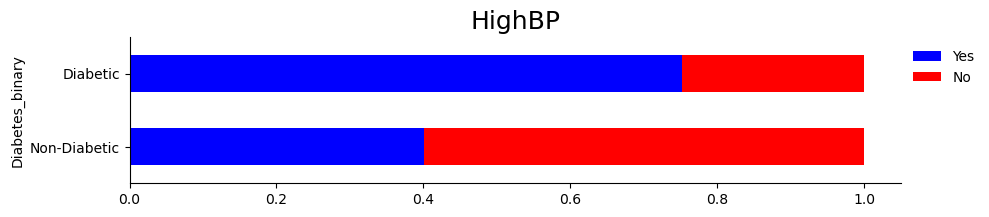

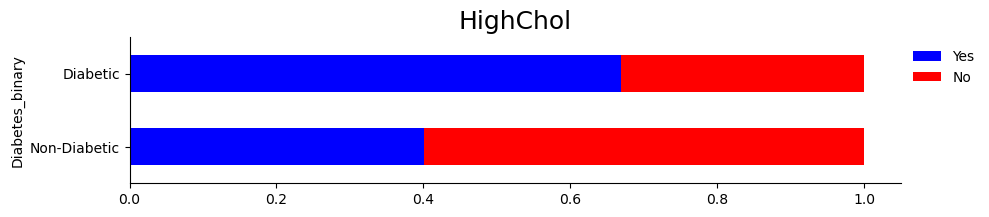

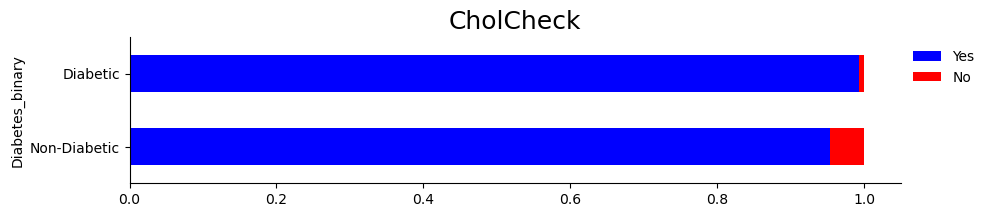

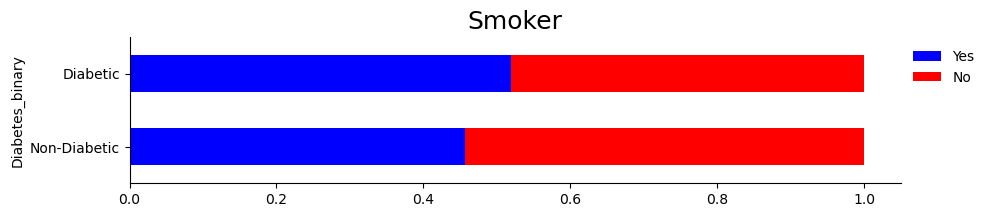

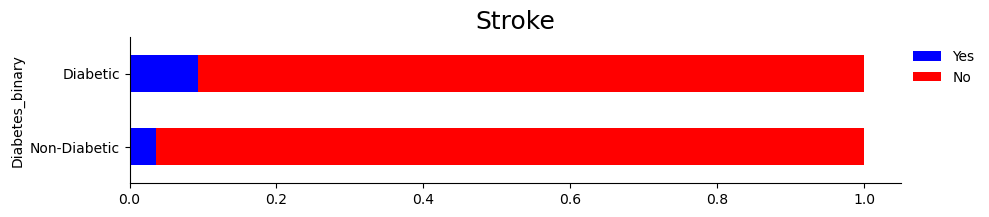

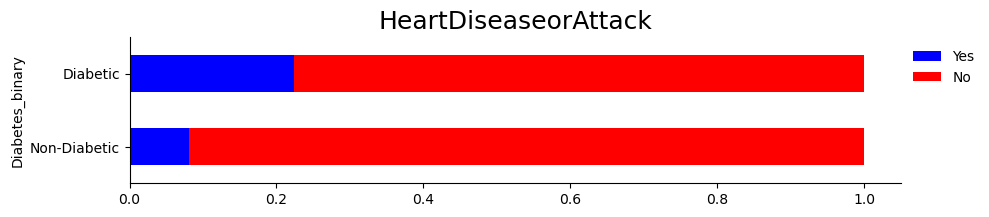

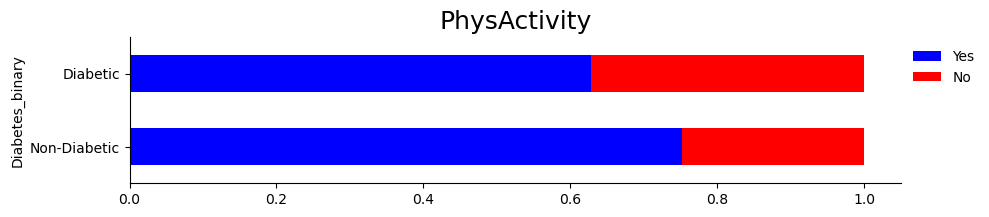

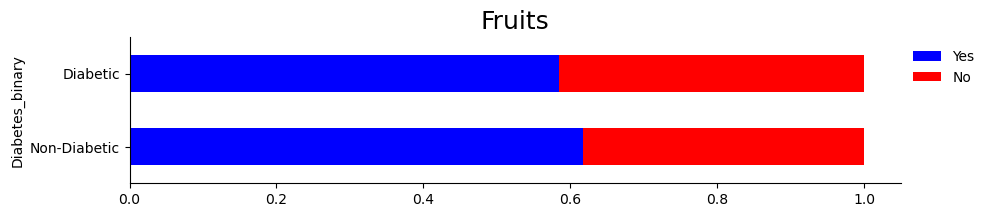

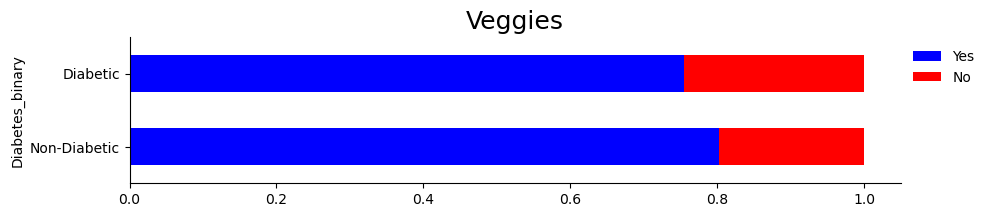

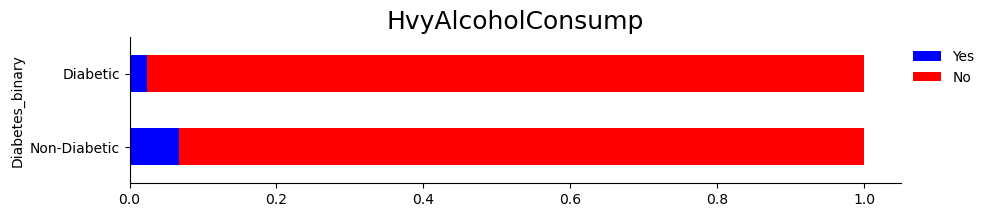

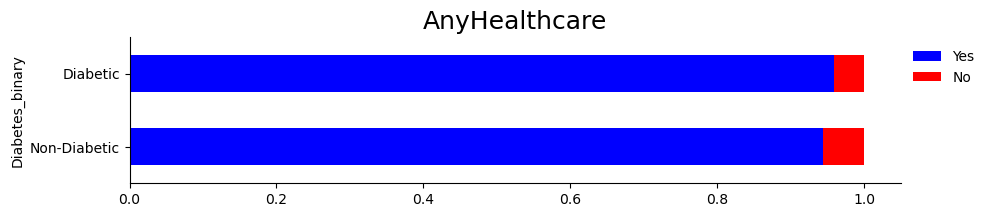

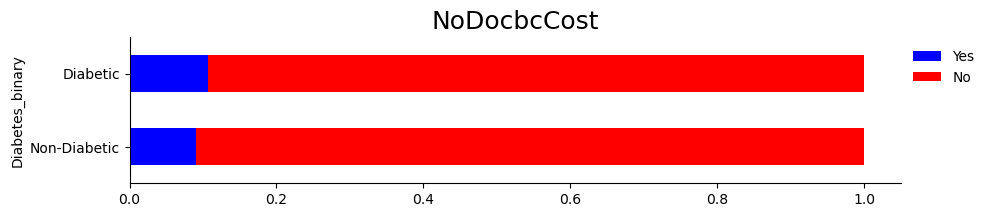

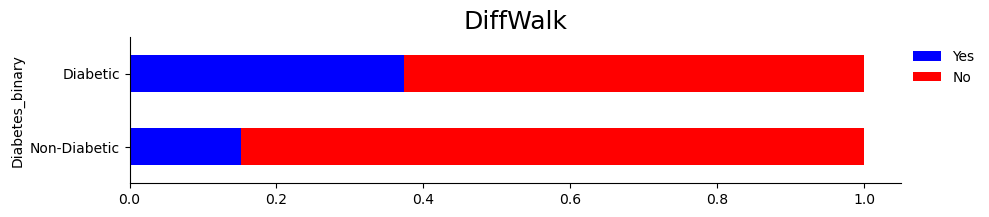

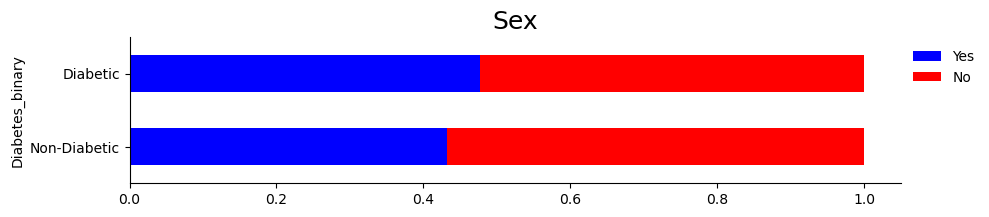

In [25]:
for var in bool_vars:
    analyse_cat(var)

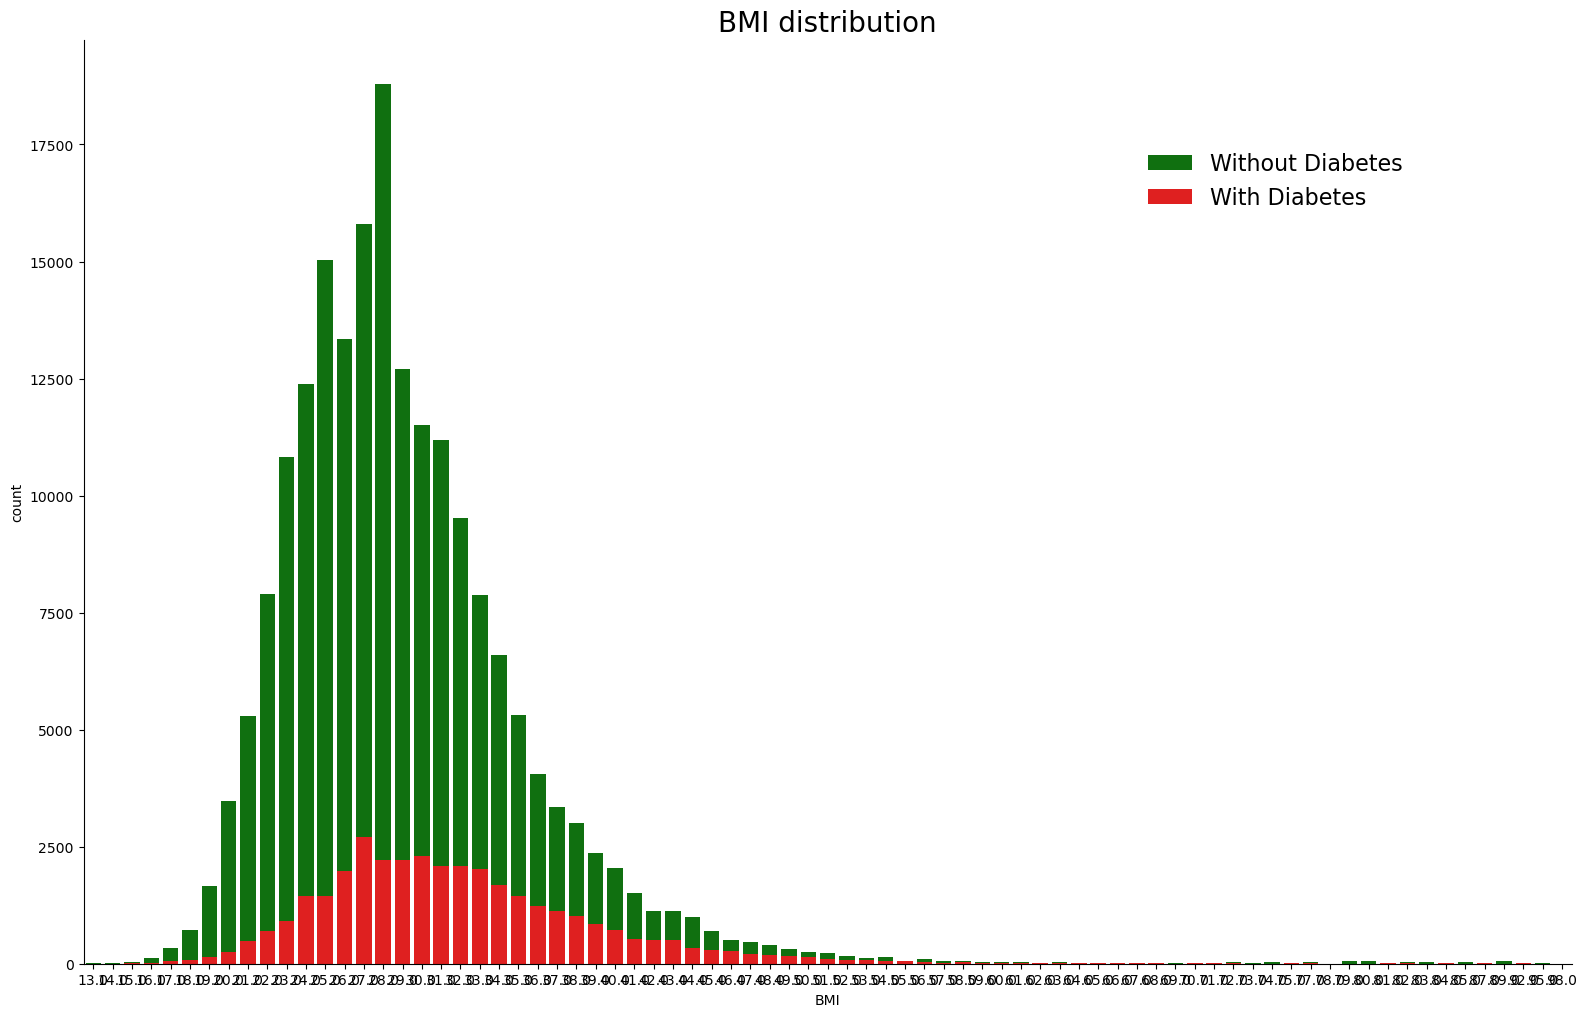

In [26]:
ratio = 12
plt.figure(figsize=(ratio*1.6,ratio))

sns.countplot(x=(df[df['Diabetes_binary']==False]['BMI']), color='green', label="Without Diabetes")
sns.countplot(x=(df[df['Diabetes_binary']==True]['BMI']), color='red', label="With Diabetes" )
sns.despine()
plt.title("BMI distribution", size=20)
plt.legend(bbox_to_anchor=(.9, .9, 0, 0),shadow=False, frameon=False, prop={'size':16});

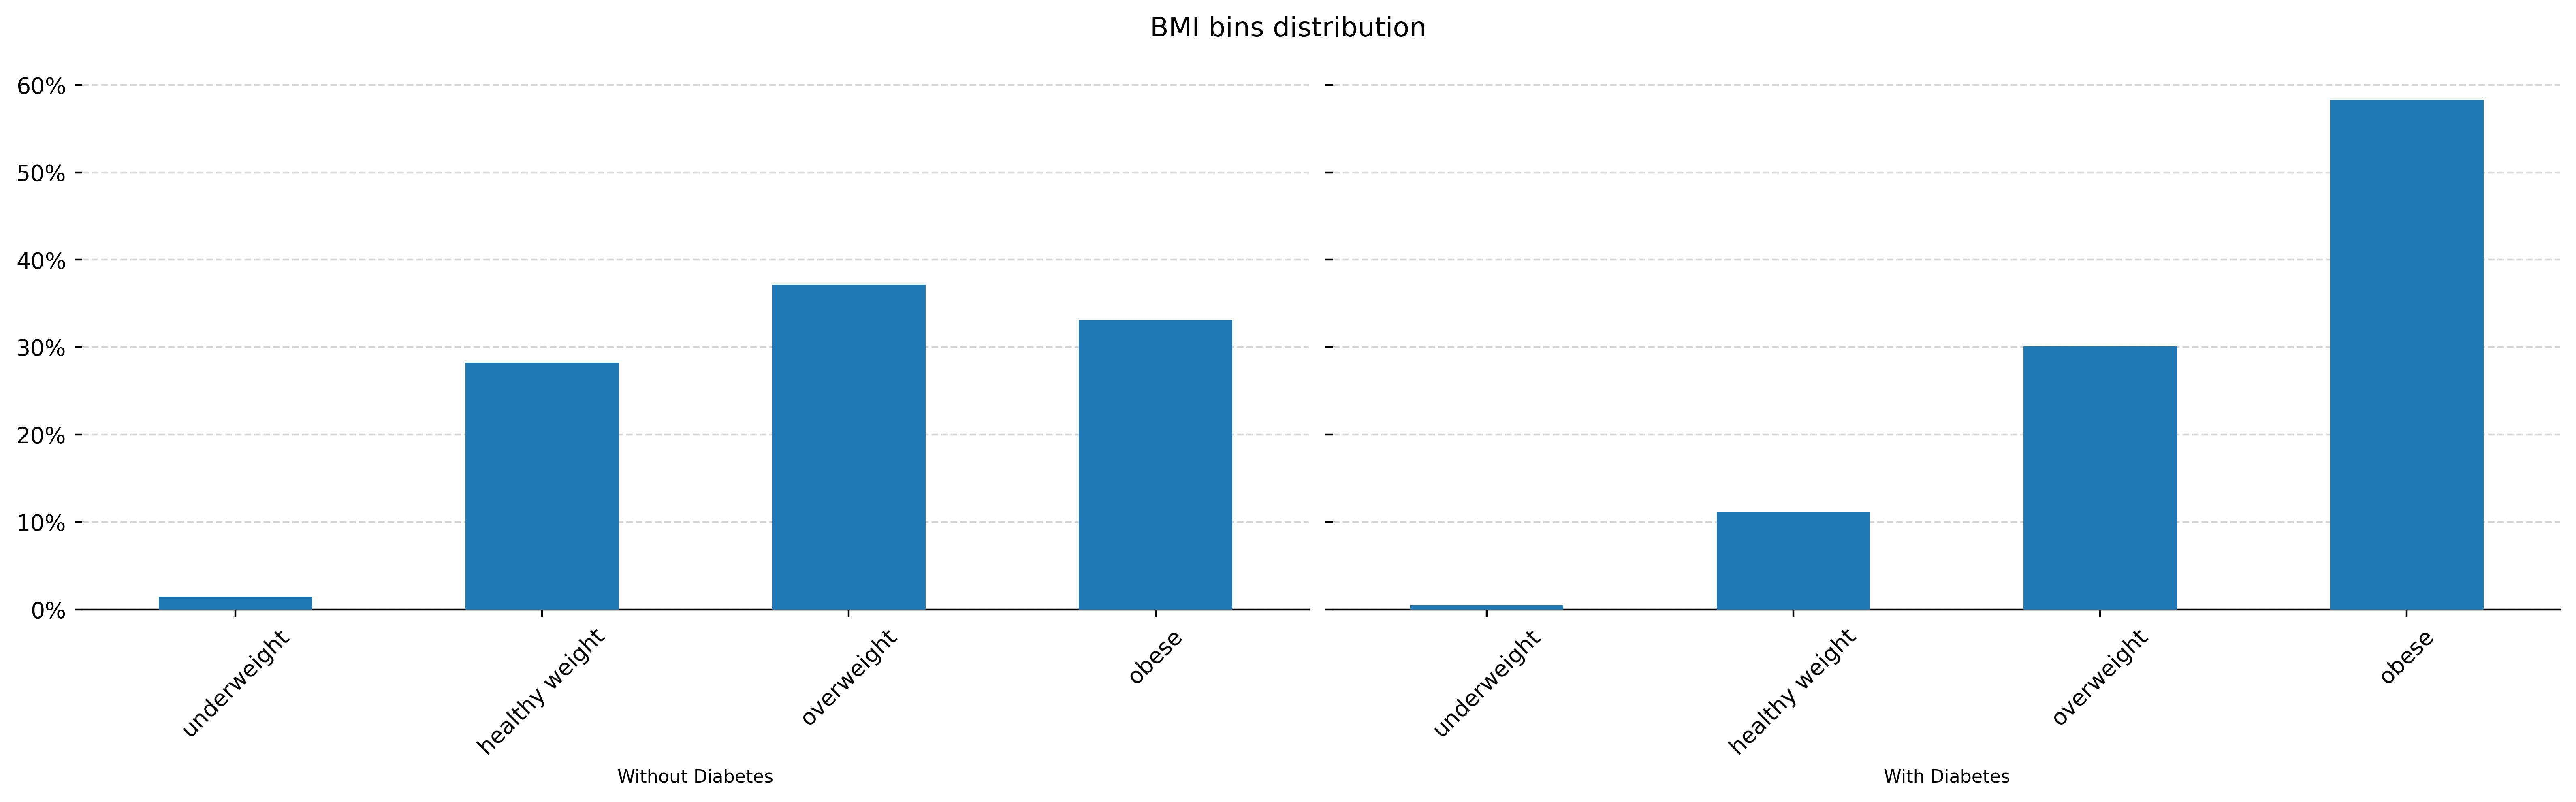

In [27]:
# create new binned column 
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['underweight', 'healthy weight', 'overweight', 'obese']


df.loc[:, 'BMI_bins'] = pd.cut(df['BMI'], bins=bins, labels=labels)

ratio = 5

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(ratio * 3.2, ratio), dpi=400, sharey=True)
fig.suptitle('BMI bins distribution')

(df[df['Diabetes_binary'] == False]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax, kind='bar', zorder=3)).spines[['top', 'right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes', size=8)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_xticklabels(labels)
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

(df[df['Diabetes_binary'] == True]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top', 'right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes', size=8)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.set_xticklabels(labels)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [28]:
percentage_diabetes = (df[df['Diabetes_binary'] == True]['BMI_bins'].value_counts(1) * 100).sort_index()

print("Percentage of each BMI bin from people with diabetes:")
for bin_label, percentage in percentage_diabetes.items():
    print(f"{bin_label}: {percentage:.2f}%")


Percentage of each BMI bin from people with diabetes:
underweight: 0.48%
healthy weight: 11.14%
overweight: 30.10%
obese: 58.28%


# People with diabetes, most of the time are obese 

# Some question

In [29]:
# Research question : Association between risk factors and diabetes
col_list = ['GenHlth', 'HighBP', 'DiffWalk', 'BMI', 'HighChol', 'Age', 
            'HeartDiseaseorAttack', 'PhysHlth', 'Income', 'Education', 'PhysActivity']


for column in col_list:
    contingency_table = pd.crosstab(df[column], df['Diabetes_binary'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
            
    print(f'P Value for {column} and Diabetes is: {p_value}')

    if p_value < 0.05:
        print(f"There is a significant association between {column} and the prevalence of diabetes.\n")
    else:
        print(f"There is no significant association between {column} and the prevalence of diabetes.\n")


P Value for GenHlth and Diabetes is: 0.0
There is a significant association between GenHlth and the prevalence of diabetes.

P Value for HighBP and Diabetes is: 0.0
There is a significant association between HighBP and the prevalence of diabetes.

P Value for DiffWalk and Diabetes is: 0.0
There is a significant association between DiffWalk and the prevalence of diabetes.

P Value for BMI and Diabetes is: 0.0
There is a significant association between BMI and the prevalence of diabetes.

P Value for HighChol and Diabetes is: 0.0
There is a significant association between HighChol and the prevalence of diabetes.

P Value for Age and Diabetes is: 0.0
There is a significant association between Age and the prevalence of diabetes.

P Value for HeartDiseaseorAttack and Diabetes is: 0.0
There is a significant association between HeartDiseaseorAttack and the prevalence of diabetes.

P Value for PhysHlth and Diabetes is: 0.0
There is a significant association between PhysHlth and the prevalence 